[[83 20]
 [22 75]]


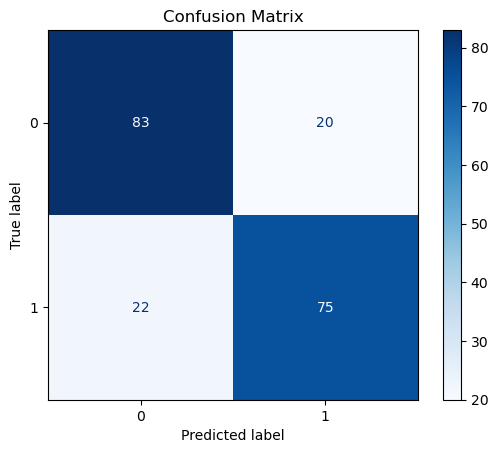

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       103
           1       0.79      0.77      0.78        97

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [7]:
#Logistic Regression:Takes input features and produces a raw output (logit), which is a real number.


#The sigmoid function converts the logit into a probability between 0 and 1:

#sigmoid(x) = 1 / (1 + e^(-x))
#where e is the base of the natural logarithm.
#The output of the sigmoid is a probability 
#A threshold (commonly 0.5) is applied:
#If probability > 0.5, predict 1.
#If probability < 0.5, predict 0.
#In short, the sigmoid function turns the raw output (logit) into a probability, 
#which is then used to make a binary prediction (0 or 1).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Loading  the dataset
data = pd.read_csv('cancer_prediction_data.csv')

#  Prepare features (X) and target (y)
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target variable

#  Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = logreg.predict(X_test)

#Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 7: Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


'''
Accuracy
(TP +TN)/(TP +TN +FP + FN) = (75+83)/(75+83+20+22) = 158/200 = 0.79(79%)

1. Precision (Positive Predictive Value - PPV): 80.5% (How many predicted positives are actually positive)
    - Formula: TP / (TP + FP)
    - Calculation: 83 / (83 + 20) ≈ 0.805
2. Recall (Sensitivity or True Positive Rate - TPR): 79% (How well the model finds actual positives)
    - Formula: TP / (TP + FN)
    - Calculation: 83 / (83 + 22) ≈ 0.790
3. F1 Score (Harmonic Mean of Precision and Recall): 79.7% (Balance between precision and recall)
    - Formula: 2 * (Precision * Recall) / (Precision + Recall)
    - Calculation: 2 * (0.805 * 0.790) / (0.805 + 0.790) ≈ 0.797
4. Specificity (True Negative Rate - TNR): 78.9% (How well negatives are classified)
    - Formula: TN / (TN + FP)
    - Calculation: 75 / (75 + 20) ≈ 0.789

Summary of Performance
TP, FP, FN,TN
- Accuracy: 79% (Overall correctness of the model)
- Precision: 80.5% (How many predicted positives are correct)
- Recall: 79% (How well the model finds actual positives)
- F1 Score: 79.7% (Balance between precision and recall)
- Specificity: 78.9% (How well negatives are classified)'''
                                                                    